## CAH 

L'analyse hiérarchique ascendante (ou CAH) est une technique de clustering est utilisée pour regrouper des données en fonction de leurs similitudes en créant une hiérarchie de regroupements à partir des données.

In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [2]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary,Monetary_bis
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348,38.71
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432,179.12
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031,72.20
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373,28.62
...,...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089,85.08
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569,195.00
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809,271.01
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544,220.58


Pour simplifier notre étude sur le nombre de cluster que nous allons créer, nous pouvons effectuer un échantillonnage de nos données afin d'optimiser les test de clustering.

In [53]:
df_sample = df.sample(10000, replace=False)
df_sample.shape

(10000, 4)

In [54]:
X = df_sample.drop('customer_unique_id', axis=1).values
y = df_sample['customer_unique_id'].values
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [55]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(10000, 3)


Pour déterminer le nombre de clusters adéquats pour la segmentation des clients avec ce modèle de ML nous utilisons un dendrogramme. C'est un type de diagramme arborescent utilisé en analyse hiérarchique pour représenter la manière dont les clusters (ou groupes) de données sont formés et organisés au fil des étapes de l'analyse.
Un dendrogramme est particulièrement utile pour visualiser la structure hiérarchique des regroupements de données. Il permet de comprendre comment les clusters sont formés, quels sont les points de jonction les plus significatifs, et comment les groupes sont liés entre eux.

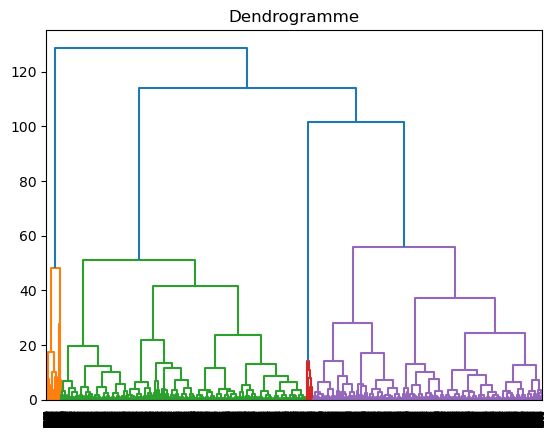

In [56]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

distance_matrix = linkage(X_norm, method='ward')
dendrogram_plot = dendrogram(distance_matrix)

plt.title('Dendrogramme')
plt.show()

In [57]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544


In [58]:
df_sample = df.sample(25000, replace=False)
df_sample.shape

(25000, 4)

In [59]:
X = df_sample.drop('customer_unique_id', axis=1).values
#y = df_sample['customer_unique_id'].values
#X = df_sample.drop('customer_unique_id', axis=1).copy()
y = pd.DataFrame(df_sample['customer_unique_id'].copy())
print(X.shape)
print(y.shape)

(25000, 3)
(25000, 1)


In [60]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(25000, 3)


In [61]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5
CAH = AgglomerativeClustering(n_clusters=n_clusters)

In [62]:
import time

In [63]:
scoring_time_start = time.time()
clusters = CAH.fit_predict(X_norm)
scoring_time_end = time.time()

In [64]:
X[:, 0]

array([31.91795885, 33.11811879, 14.57876285, ..., 33.11811879,
       32.3842738 , 22.50547085])

Nous pouvons par la suite agréger les différents cluster observés aux différents individus et les observer graphiquement. Le nombre de variable de la segmentation RFM étant au nombre de 3 nous effectuons une visualisation graphique en 3D.

In [65]:
y['Recency'] = X[:, 0]
y['Frequency'] = X[:, 1]
y['Monetary'] = X[:, 2]
df_cluster = y.copy()
df_cluster['Cluster'] = clusters
df_cluster

,customer_unique_id,Recency,Frequency,Monetary,Cluster
41250,dd8d6412f348821c9a9cb8f8cded4e54,31.917959,1.0,1.800749,0
39834,0b8751ce40001ab30575c73018b81f39,33.118119,1.0,1.472187,0
2103,5e595be768fd3dc726cfb9022af58bb3,14.578763,1.0,1.650900,2
40119,11797ab674c60dee39614c4d4ead8ffb,26.904094,1.0,1.577844,0
300,396e89f9a8b20de569b4f649539028db,21.247756,1.0,1.754088,4
...,...,...,...,...,...
56355,66d8576e09f38bde80fe38193acaa95d,27.543203,1.0,1.659902,0
55049,6f1ba5e4978c1905115578217b12edc7,30.436505,1.0,1.656725,0
93857,20bac1d3ca8452f298ae302897174443,33.118119,1.0,1.756947,0
94103,709d2a72ef3652f89310ced4d363c4d0,32.384274,1.0,1.509891,0


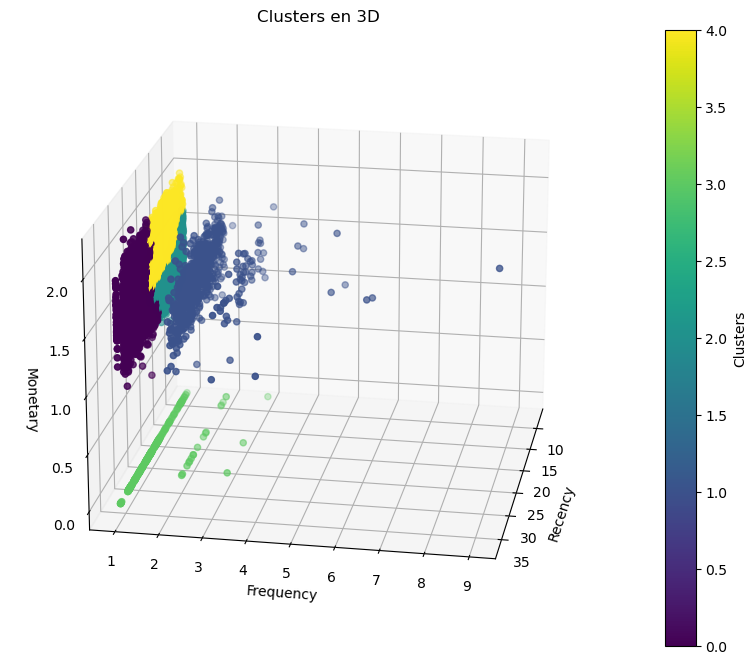

In [66]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_cluster['Recency'], df_cluster['Frequency'], df_cluster['Monetary'], c=df_cluster['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

Cette étape nous permet d'évaluer la pertinence du modèle en réalisant une étude de sa performance avec différentes métriques.
 - Un métric de temps de calcul du modèle de ML.
 - Le silhouette score
 - le coefficient de distortion n'étant pas disponible pour ce modèle nous l'initialisons à 0.
 - Davies Bouldin (mesure à quel point les clusters sont compacts et bien séparés les uns des autres.)

In [67]:
from sklearn.metrics import davies_bouldin_score
from sklearn import cluster, metrics

duration_time = scoring_time_end - scoring_time_start
silh_score = metrics.silhouette_score(X_norm, clusters)
distortion = 0
db_score = davies_bouldin_score(X_norm, clusters)

In [76]:
import sys
sys.path.append('..')
from PythonFiles.Utils2 import *

In [77]:
resultats_modele3 = scoring_function('CAH', duration_time, silh_score, distortion, db_score)
resultats_modele3

,Model_name,Time,Silhouette_score,Coef_distortion,Davies-bouldin
0,CAH,118.209087,0.312537,0,0.857194


In [78]:
AllScore_function(resultats_modele3)

In [79]:
df_testx = pd.read_csv('../Data/0.global_scoring.csv')
df_testx

,Unnamed: 0,Model_name,Time,Silhouette_score,Coef_distortion,Davies-bouldin
0,NaN,k_means,0.312857,0.408213,98799.669701,0.686330
1,NaN,DBSCAN,62.838577,0.690714,0.000000,0.808110
2,NaN,CAH,118.209087,0.312537,0.000000,0.857194
